<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Estadistica_e_InferenciaCausal/2%20Inferencia%20Bayesiana/Notebooks/Inferencia_Bayesiana_Distribuciones_conjugadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

import datetime
from scipy.special import factorial
from numpy import exp

from scipy.stats import poisson, gamma

import matplotlib.pyplot as plt

## Definición del problema:

Conocer el promedio diario de ciclistas que transitan por el puente de Brooklin, parámetro al que llamaremos ($\lambda$),  a partir de una distribución de probabilidad conocida (conocimiento a priori)

$$P(\lambda\mid s) = \frac{P(s\mid \lambda)~~P(\lambda)}{P(s)}$$

Supuestos: 
* $s$ es la variable aleatoria que representa al número de ciclistas que trnsitan diariamente por el puente de Brooklin.
* $s$ sigue una [distribución de Poisson](https://github.com/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana3/Notebooks/Bernoulli%2C_binomial%2C_poisson__.ipynb)
* En la distribución de Poisson λ es el número promedio
de eventos por unidad de tiempo[1]
* la distribución previa y posterior (a la evidencia)  del promedio de ciclistas diario, sigue una distribución de probabilidad gamma (que es la distribución conjugada cuando la verosimilitud es poisson)

### Datos empiricos

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/main/Estadistica_e_InferenciaCausal/2%20Inferencia%20Bayesiana/Datos/Bicis_NY.csv',
                 usecols=['Date','Brooklyn Bridge'], 
                 parse_dates=['Date'],
                 index_col='Date')
df.sort_index(inplace=True)
df

,Brooklyn Bridge
Date,
2017-04-01,6.06
2017-04-02,20.21
2017-04-03,24.70
2017-04-04,7.23
2017-04-05,28.07
...,...
2017-10-27,31.50
2017-10-28,22.45
2017-10-29,1.83


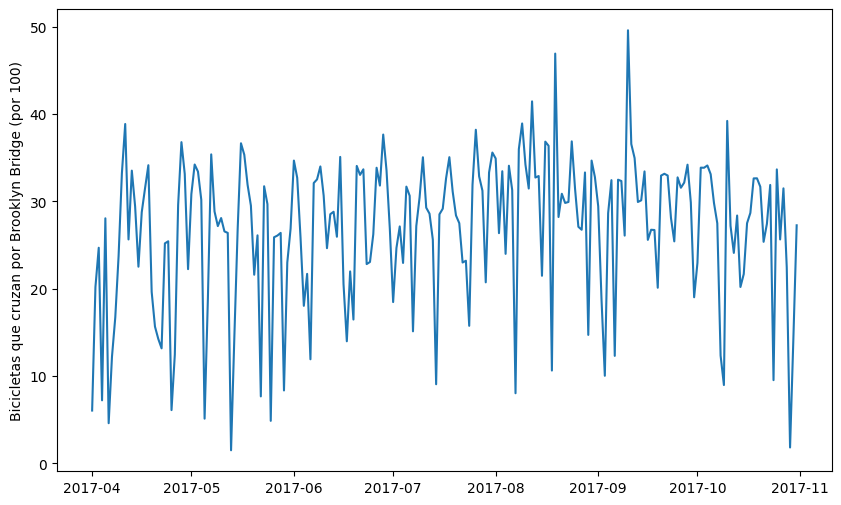

In [5]:
plt.figure(figsize=(10,6))
plt.plot(df['Brooklyn Bridge'],label='Observaciones diarias')
plt.ylabel('Bicicletas que cruzan por Brooklyn Bridge (por 100)')
plt.show()

In [ ]:
λ = df['Brooklyn Bridge'].mean()
λ

26.800420560747664

Los datos que se generan a continuación se parecen a los que tenemos empiricamente, asumiendo que es una de muchas muchas muestras posibles a partir de una distribución de poisson.

#### Distribución de probabilidad **a priori** de  $\lambda$ 


[Distribución Gamma](https://en.wikipedia.org/wiki/Gamma_distribution)

 $E(\lambda)  = k ~\theta$

 $varianza = k ~ \theta^2$



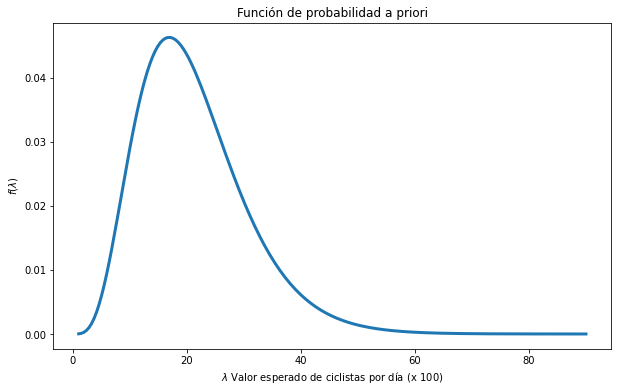

In [ ]:
# Parametros conocidos (a priori)
k, theta = 5, 4.22

xs = np.linspace(1,90,200)
prior_pdf = gamma.pdf(xs, k, scale=theta)

plt.figure(figsize=(10,6))
plt.plot(xs,prior_pdf,linewidth=3)

plt.xlabel('$\lambda$ Valor esperado de ciclistas por día (x 100)')
plt.ylabel('$f(\lambda)$')
plt.title('Función de probabilidad a priori')
plt.show()

#### Nuevos datos


In [ ]:
may = df.loc['2017-05-01':'2017-05-31']

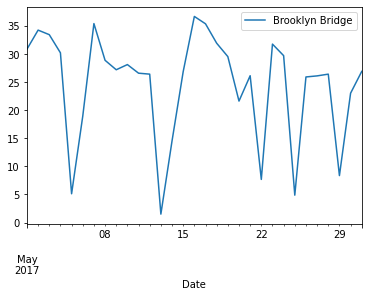

In [ ]:
may.plot()

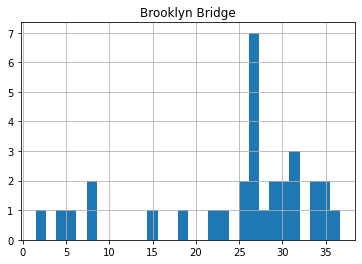

In [ ]:
may.hist(bins=30)
plt.show()

In [ ]:
may.mean()

Brooklyn Bridge    24.513226
dtype: float64

#### Parametros posteriores

In [ ]:
def k_theta_post(nuevos_datos, prior_k, prior_theta):
    
    post_k = prior_k + np.sum(nuevos_datos)
    post_theta = prior_theta/(nuevos_datos.shape[0] * prior_theta + 1.0)
       
    return post_k, post_theta

In [ ]:
may_k, may_theta = k_theta_post(may.values, k, theta)

In [ ]:
may_k, may_theta

(764.91, 0.03201335153997876)

In [ ]:
λ_may = may_k*may_theta
λ_may

24.48733272644515

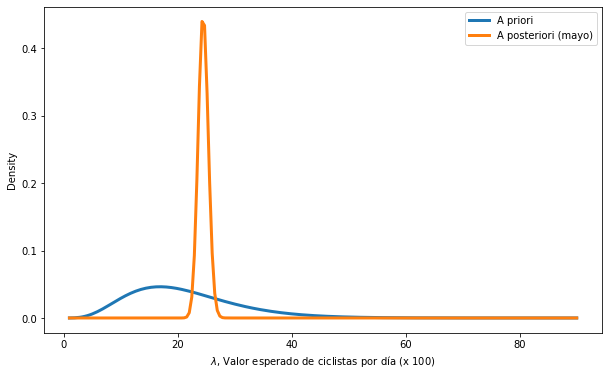

In [ ]:
may_post = gamma.pdf(xs, may_k, scale=may_theta)

 
plt.figure(figsize=(10,6))
plt.plot(xs,prior_pdf,linewidth=3,label='A priori')
plt.plot(xs,may_post,linewidth=3,label='A posteriori (mayo)')

plt.xlabel('$\lambda$, Valor esperado de ciclistas por día (x 100)')
plt.ylabel('Density')
plt.legend()
plt.show()


# Para profundizar

* Calcular la distribución de probablidad del promedio diario de ciclistas en fin de semana
* Calcular la distribución de probabilidad del promedio diario de ciclistas en un día lluvioso

# Referencias
[1]F. Muñoz, «Distribuciones Poisson y Gamma: Una Discreta y Continua Relación.», prospect, vol. 12, n.º 1, p. 99, ago. 2014, doi: 10.15665/rp.v12i1.156.

[2]dartmouth-math76/conjugate-inference-solution. Dartmouth Math76 (Summer 2020), 2020. Accedido: 6 de agosto de 2021. [En línea]. Disponible en: https://github.com/dartmouth-math76/conjugate-inference-solution/blob/f98e6c7d477a05016d913d4669227c35cd65905b/conjugate-inference-solution.ipynb

[3]«Conjugate prior», Wikipedia. 27 de julio de 2021. Accedido: 6 de agosto de 2021. [En línea]. Disponible en: https://en.wikipedia.org/w/index.php?title=Conjugate_prior&oldid=1035720106
